# 1) Delivery_time -> Predict delivery time using sorting time 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Admin\AppData\Local\Temp\ipykernel_9456\2217253749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

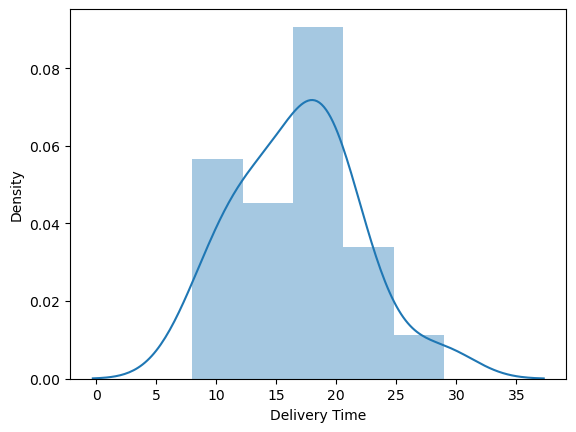

In [9]:
sns.distplot(data['Delivery Time'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9456\3932129489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

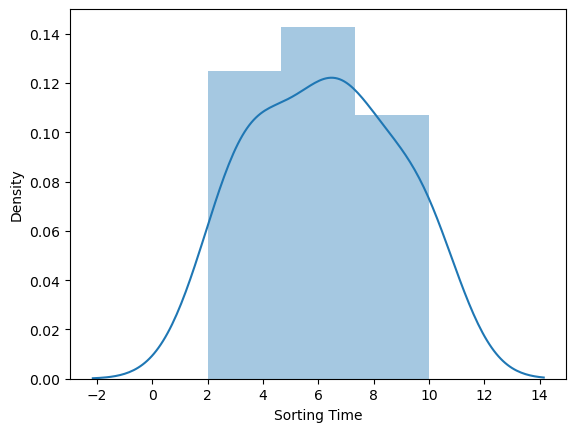

In [10]:
sns.distplot(data['Sorting Time'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9456\1108602903.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Delivery Time')

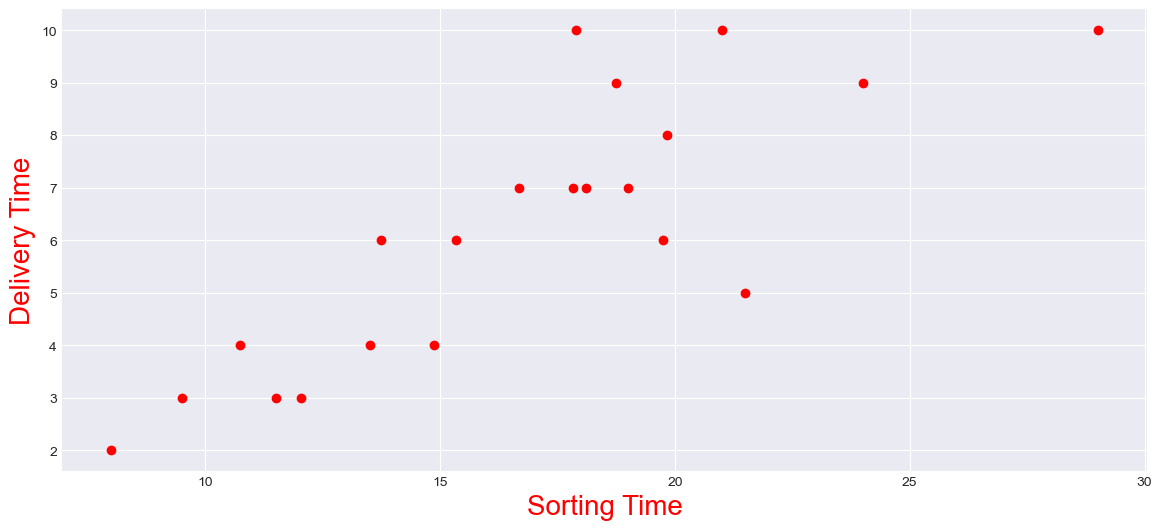

In [11]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["Delivery Time"],data["Sorting Time"],color="red")
plt.xlabel("Sorting Time",size=20,color="red")
plt.ylabel("Delivery Time",size=20,color="red")

# Feature Engineering

In [12]:
# Renaming Columns
d1=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
d1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [13]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

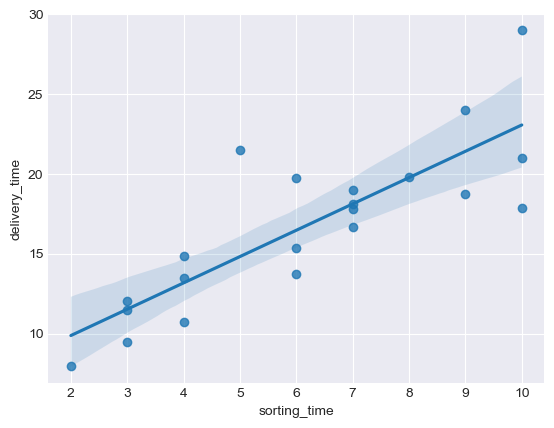

In [16]:
sns.regplot(x=d1['sorting_time'],y=d1['delivery_time'])

# Model Building & Testing

In [17]:
import statsmodels.formula.api as smf

In [18]:
model=smf.ols("delivery_time~sorting_time",data=d1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        00:02:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Admin\AppData\Local\Temp\ipykernel_9456\1548635861.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'delivery_time')

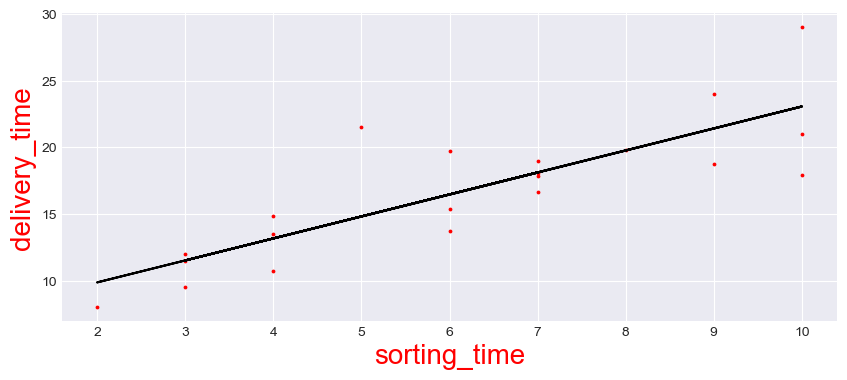

In [20]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(d1["sorting_time"],d1["delivery_time"],color="red",s=3)
plt.plot(d1["sorting_time"],model.predict(),color="black")
plt.xlabel("sorting_time",size=20,color="red")
plt.ylabel("delivery_time",size=20,color="red")

# Apply log transformation to improve accuracy

In [27]:
model2=smf.ols("delivery_time~np.log(sorting_time)",data=d1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           2.64e-06
Time:                        00:09:30   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model3=smf.ols("np.log(delivery_time)~(sorting_time)",data=d1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 23 Sep 2023   Prob (F-statistic):           1.59e-06
Time:                           00:14:02   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Apply square-root transformation to improve accuracy

In [31]:
model4=smf.ols("np.log(delivery_time)~sorting_time+pow(sorting_time,2)",data=d1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sat, 23 Sep 2023   Prob (F-statistic):           2.20e-06
Time:                           00:15:33   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time             0.2659      0.080      3.315      0.004       0.097       0.434
pow(sorting_time, 2)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  Apply cube-root transformation to improve accuracy

In [33]:
model5=smf.ols("np.log(delivery_time)~sorting_time+pow(sorting_time,3)",data=d1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.758
Model:                               OLS   Adj. R-squared:                  0.731
Method:                    Least Squares   F-statistic:                     28.21
Date:                   Sat, 23 Sep 2023   Prob (F-statistic):           2.83e-06
Time:                           00:17:16   Log-Likelihood:                 9.6624
No. Observations:                     21   AIC:                            -13.32
Df Residuals:                         18   BIC:                            -10.19
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.8394      0.179     10.280      0.000       1.464       2.215
sorting_time             0.1874      0.046      4.071      0.001       0.091       0.284
pow(sorting_time, 3)    -0.0006      0.000     -1.873      0.077      -0.001    7.75e-05
==============================================================================
Omnibus:                        2.870   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.000
Skew:                           0.754   Prob(JB):                        0.368
Kurtosis:                       2.879   Cond. No.                     2.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
from scipy.stats import kurtosis,skew
skew(d1),kurtosis(d1)

(array([0.32670263, 0.04368099]), array([-0.02558577, -1.16539014]))

# Model Predictions

In [36]:
# Among all the model testing "model4" giving the best accuracy

C:\Users\Admin\AppData\Local\Temp\ipykernel_9456\3913062956.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'delivery_time')

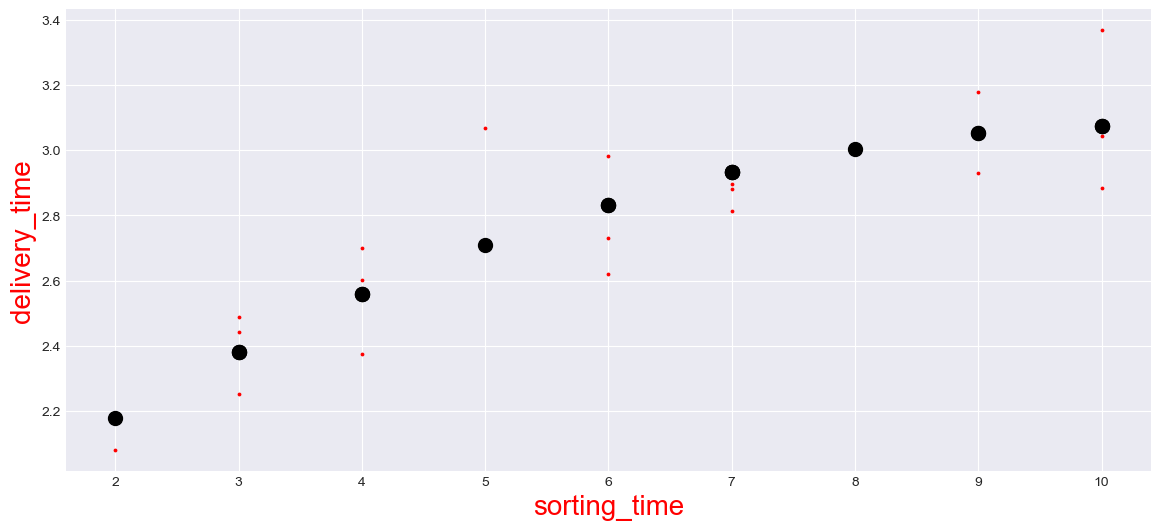

In [46]:
model4=smf.ols("np.log(delivery_time)~sorting_time+pow(sorting_time,2)",data=d1).fit()
model4.summary()



plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(d1["sorting_time"],np.log(d1["delivery_time"]),color="red",s=3)
plt.scatter(d1["sorting_time"],model4.fittedvalues,color="black",s=100)


plt.xlabel("sorting_time",size=20,color="red")
plt.ylabel("delivery_time",size=20,color="red")

In [38]:
newdata=pd.Series([10,7])
newdata

0    10
1     7
dtype: int64

In [39]:
data_pred=pd.DataFrame(newdata,columns=["sorting_time"])
data_pred

,sorting_time
0,10
1,7


In [44]:
model4.predict(data_pred)

0    3.074863
1    2.931968
dtype: float64